In [1]:
 """
Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy
"""


'\nImplementing Feedforward neural networks with Keras and TensorFlow\na. Import the necessary packages\nb. Load the training and testing data (MNIST/CIFAR10)\nc. Define the network architecture using Keras\nd. Train the model using SGD\ne. Evaluate the network\nf. Plot the training loss and accuracy\n'

In [2]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [3]:
#---------------Load the training and testing data(MNIST)-----------------------------

In [4]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# to see the length of training datasets
len(x_train)     # len of y_train is also same = 60000

60000

In [6]:
len(x_test)      # len of y_test is also same = 10000

10000

In [8]:
len(y_test)

10000

In [9]:
len(y_train)

60000

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
#we want to see first image

x_train[0]

#It is showing image of matrix of size 28*28 pixels(Total 784 features)
#each feature represents the intensity between 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

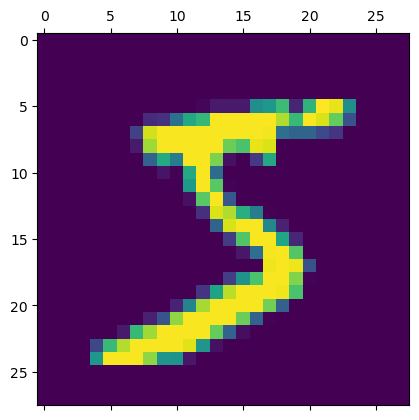

In [12]:
#to see how first image look
plt.matshow(x_train[0])

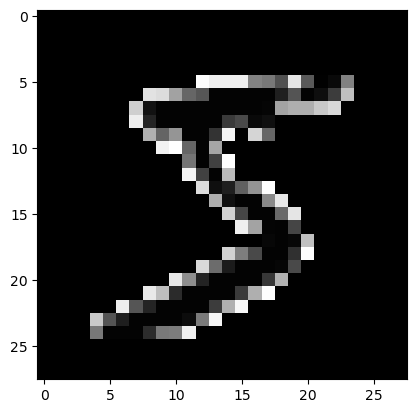

In [6]:
plt.imshow(-x_train[0], cmap="gray")


In [13]:
#normalize the images by scaling pixel intensities to the range 0,1
#Normalization is a technique for organizing data in a database.

x_train = x_train / 255
x_test = x_test / 255

#here 255 is maximum value of intensity that's why it is divided by 255

In [7]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#--------------------Creating the model--------------------

In [15]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),    #Input layer
keras.layers.Dense(128, activation="relu"),    #hidden layer abs
keras.layers.Dense(10, activation="softmax")   #output layer
])
model.summary()

# Sigmoid has less accuracy thats why ReLU is used
# RelU-> Activation function. 
#        Rectified Linear Unit
#        Return '0' if input is negative else linear if input is positive.
# softmax-> Activation function
#           chnges input value into values that reach from 0 to 1.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#------------------------ Compile the model--------------------------

In [16]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",    # crossentropy reduces the loss
metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)   
# epochs means duration
# data is stored in history

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6514 - accuracy: 0.8349 - val_loss: 0.3581 - val_accuracy: 0.9016
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3390 - accuracy: 0.9047 - val_loss: 0.2970 - val_accuracy: 0.9172
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2900 - accuracy: 0.9173 - val_loss: 0.2629 - val_accuracy: 0.9274
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2589 - accuracy: 0.9269 - val_loss: 0.2406 - val_accuracy: 0.9333
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2347 - accuracy: 0.9338 - val_loss: 0.2179 - val_accuracy: 0.9392
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2154 - accuracy: 0.9393 - val_loss: 0.2027 - val_accuracy: 0.9419
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1992 - accuracy: 0.9438 - val_loss: 0.1905 - val_accuracy

In [18]:
# ---------------------------Evaluate Model-------------------------------

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1604 - accuracy: 0.9534
Loss=0.160
Accuracy=0.953


In [20]:
# ---------------------- Making prediction on New Data----------------------------

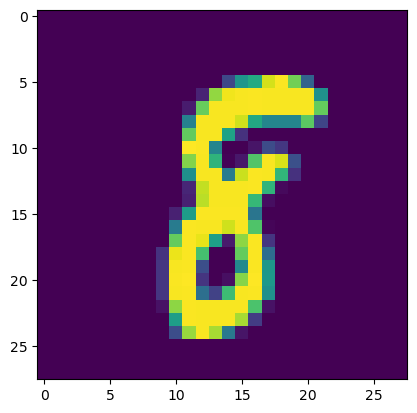

In [21]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [22]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 8


In [23]:
# ----------------------Plot graph for Accuracy and Loss-----------------------

In [24]:
history.history??

In [26]:
history.history.keys()   #  as data is stored in histoty

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

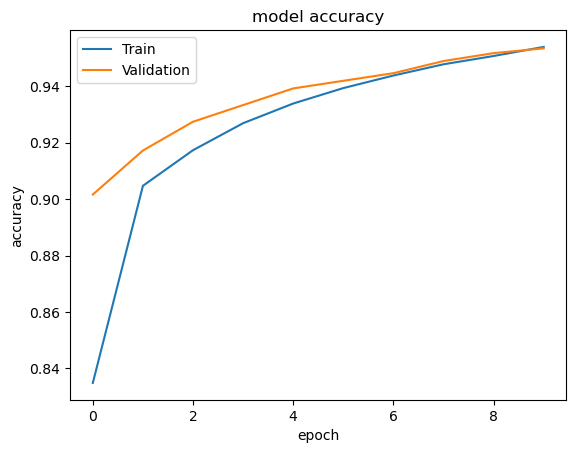

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

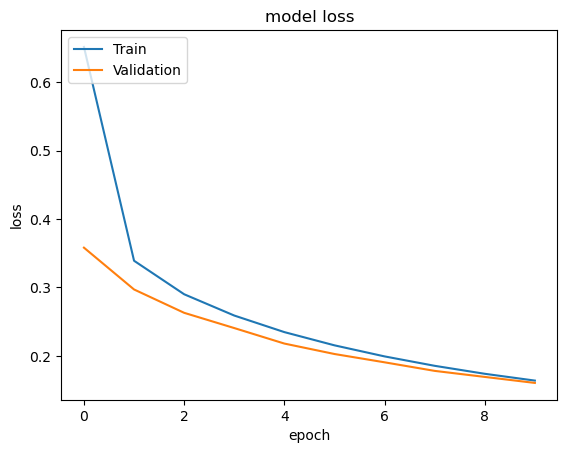

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

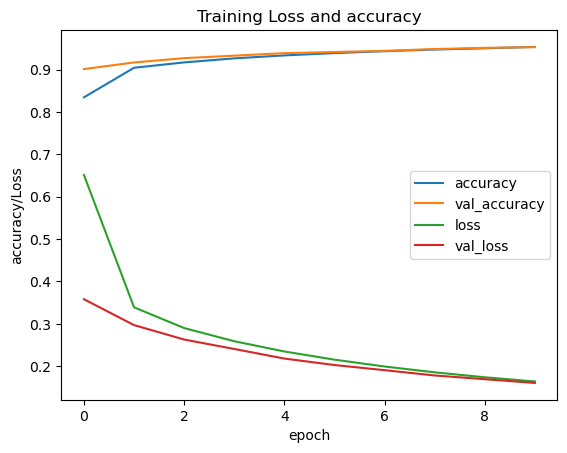

In [33]:
# Accuracy and loss on tarin data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [35]:
# -----------------------------Save the Model-----------------------------

In [36]:
pwd

'C:\\Users\\ASUS\\Documents\\BE IT\\Deep learning\\Practicals'

In [37]:
keras_model_path='C:\\Users\\ASUS\\Documents\\BE IT\\Deep learning\\Practicals'
#'DL.ipynb'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\ASUS\Documents\BE IT\Deep learning\Practicals\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\Documents\BE IT\Deep learning\Practicals\assets


In [38]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)